In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import io
import warnings

In [2]:
drug = pd.read_csv('./drug_consumption.csv')
drug

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Esctasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
drug.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Esctasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [4]:
x = drug [['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

In [5]:
y = drug[['Benzos']]

In [6]:
y = y.where(y == 'CL0','CL1')
y

,Benzos
0,CL1
1,CL0
2,CL0
3,CL1
4,CL0
5,CL0
6,CL0
7,CL0
8,CL0
9,CL1


In [7]:
y['Benzos'].value_counts()


CL0    1000
CL1     885
Name: Benzos, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size = 0.2, random_state = 10)

In [10]:
clf = ExtraTreesClassifier(n_estimators=250, random_state=0)
clf.fit(x_treino, y_treino)
predicted = clf.predict(x_teste)
importances = clf.feature_importances_

/Users/Dumont/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [11]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x_teste.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 5 (0.114782)
2. feature 3 (0.107908)
3. feature 7 (0.107250)
4. feature 9 (0.101659)
5. feature 11 (0.092061)
6. feature 8 (0.091878)
7. feature 6 (0.090600)
8. feature 10 (0.085869)
9. feature 2 (0.077291)
10. feature 0 (0.073754)
11. feature 4 (0.028787)
12. feature 1 (0.028159)


In [12]:
other = pd.DataFrame(predicted)
other.columns = ['Benzos']
# print(other)
df = x_teste
imp = pd.concat([df, other], axis=1)
imp = imp.dropna()

# First
countries = [0.96082, -0.57009]
benzos = ['CL0']
imp1 = imp[(imp.Country.isin(countries)) & (imp.Benzos.isin(benzos))]
imp2 = imp[(imp.Country.isin(countries)) & ~(imp.Benzos.isin(benzos))]

# Second
imp3 = imp[(imp.Benzos.isin(benzos))]
m = np.mean(imp3.filter(items=['Escore']))
imp4 = imp[~(imp.Benzos.isin(benzos))]
m2 = np.mean(imp4.filter(items=['Escore']))
print('EscoreAnalysis\nNever used:', m, '\nAlready Used: ', m2)


# Third
pulse = np.mean(imp3.filter(items=['Impulsive']))
not_pulse = np.mean(imp4.filter(items=['Impulsive']))
print('Impulsive Analysis\nNever Used:', pulse, '\nAlready Used:', not_pulse)


EscoreAnalysis
Never used: Escore    0.15529
dtype: float64 
Already Used:  Escore    0.052442
dtype: float64
Impulsive Analysis
Never Used: Impulsive   -0.198466
dtype: float64 
Already Used: Impulsive   -0.342567
dtype: float64


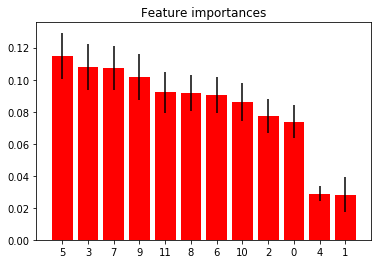

In [13]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_teste.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_teste.shape[1]), indices)
plt.xlim([-1, x_teste.shape[1]])
plt.show()

In [14]:
y = y_teste.to_numpy()
y2 = y.flatten()


In [15]:
score = accuracy_score(y2, predicted)
f1 = f1_score(y2, predicted, average = 'binary', pos_label='CL0')
print(score, f1)


0.6657824933687002 0.6971153846153846


In [16]:
listOfAcc = [score, f1]
listOfMethods = ['score', 'f1']
def plotAverageAcc(listOfAcc, listOfMethods):

    listOfAcc = np.multiply(listOfAcc, 100)

    for l in range(len(listOfAcc)):
        ax = plt.axes()
        ax.bar(l, listOfAcc[l], align='center', width=0.4)

    plt.title("Plots")
    plt.xlabel("Métricas")
    plt.ylabel("Percent")
    plt.yticks(range(0, 101, 10))
    plt.xticks(range(len(listOfAcc)), listOfMethods)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()


/Users/Dumont/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


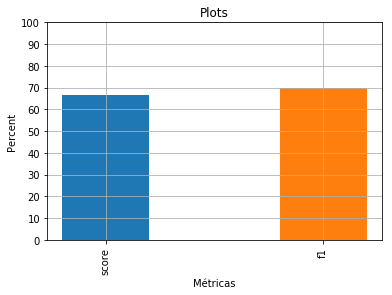

In [17]:
plotAverageAcc(listOfAcc, listOfMethods)


In [19]:
# Benzos é uma classe de consumo de benzodiazepínicos.

# Os benzodiazepínicos são primordialmente agentes sedativo-hipnóticos,
# que apresentam ainda efeitos de graus variados: ansiolítico, amnésico,
# anticonvulsivo e relaxante muscular.

# Pode ocorrer dependência fisiológica de benzodiazepínicos,
# particularmente com uso prolongado e altas doses.

# Os benzodiazepínicos geralmente são medicações perigosas em indivíduos
# que abusam de outros medicamentos psicoativos e usam o benzodiazepínico
# para aumentar os efeitos do agente primário ou para antagonizar seus efeitos adversos.
# Além disso, aqueles com dependência de álcool podem abusar de benzodiazepínicos.
# (http://www.medicinanet.com.br/conteudos/revisoes/7439/intoxicacao_por_benzodiazepinicos.htm)

# Por isso o uso de benzodiazepínicos está intimamente relacionado a uso de outras drogas,
# particularmente ao uso do Alcool.

# A característica mais importante é o "Escore", que significa NEO-FFI-R Extraversion,
# que é um dos cinco traços de personalidade da teoria da personalidade dos Cinco Grandes.
# Indica como a pessoa é extrovertida e social.

# A análise mostrou que as pessoas que nunca usaram benzodiazepínicos têm um nível mais baixo de extroversão
# (66,7%) em comparação a média dos que usaram (67,9%)
